### **Importando o Dataset**

In [60]:
import pandas as pd

ratings = pd.read_csv(r"ratings.csv")
movies = pd.read_csv(r"movies.csv")

In [61]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### **Análise exploratória dos dados**
Explorando os datasets de filmes e avaliações para entender usuários, distribuição de notas e filmes mais populares, preparando os dados para a recomendação.

In [63]:
# Quantidade de usuários e filmes
num_usuarios = ratings['userId'].nunique()
num_filmes = ratings['movieId'].nunique()
print(f"Número de usuários: {num_usuarios}")
print(f"Número de filmes: {num_filmes}\n")

# Estatísticas gerais das avaliações
estatisticas = ratings['rating'].describe().round(2)
print("Estatísticas das avaliações:")
print(estatisticas.to_string(), "\n")

Número de usuários: 610
Número de filmes: 9724

Estatísticas das avaliações:
count    100836.00
mean          3.50
std           1.04
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00 



In [64]:
# Informações gerais de cada coluna
print("=== Coluna de avaliaçãoes ===")
print(f"Linhas: {ratings.shape[0]}, Colunas: {ratings.shape[1]}")
print(ratings.dtypes)
print("Valores nulos por coluna:")
print(ratings.isnull().sum())

print("\n=== Coluna de filmes ===")
print(f"Linhas: {movies.shape[0]}, Colunas: {movies.shape[1]}")
print(movies.dtypes)
print("Valores nulos por coluna:")
print(movies.isnull().sum())

=== Coluna de avaliaçãoes ===
Linhas: 100836, Colunas: 4
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Valores nulos por coluna:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

=== Coluna de filmes ===
Linhas: 9742, Colunas: 3
movieId     int64
title      object
genres     object
dtype: object
Valores nulos por coluna:
movieId    0
title      0
genres     0
dtype: int64


C:\Users\PICHAU\AppData\Local\Temp\ipykernel_13044\4149763324.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




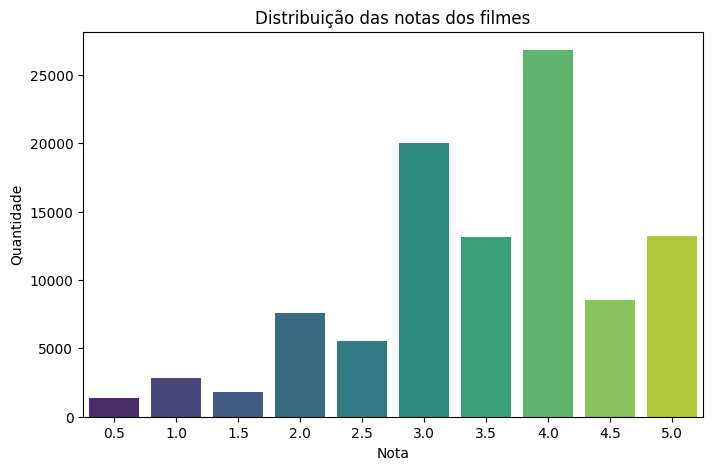

In [65]:
# Distribuição das notas dos filmes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribuição das notas dos filmes')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.show()

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_13044\3541356400.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




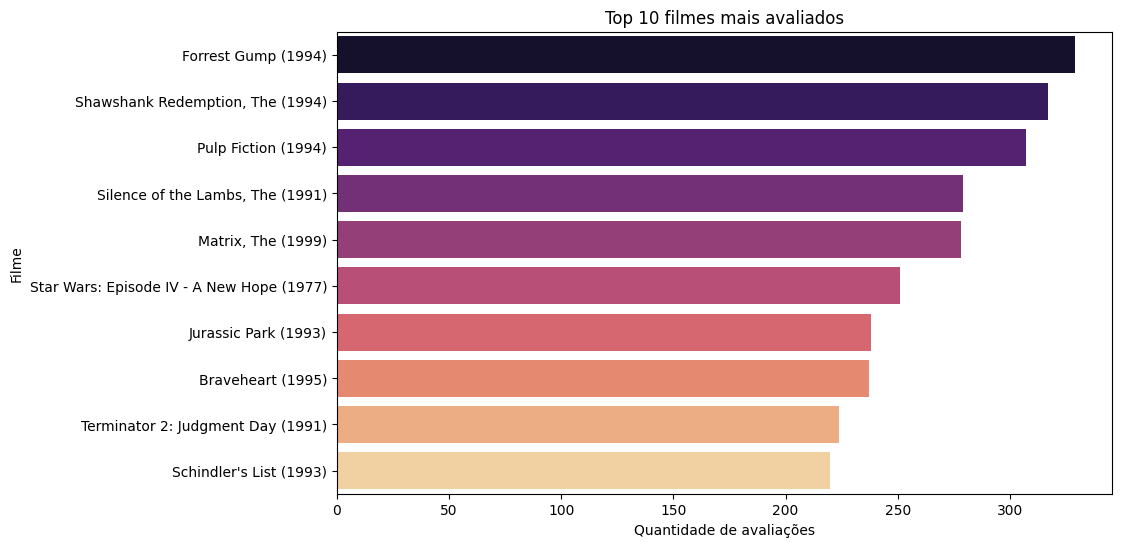

In [66]:
# Top 10 filmes mais avaliados
top_filmes = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_filmes = top_filmes.reset_index().merge(movies, on='movieId')

plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='title', data=top_filmes, palette='magma')
plt.title('Top 10 filmes mais avaliados')
plt.xlabel('Quantidade de avaliações')
plt.ylabel('Filme')
plt.show()

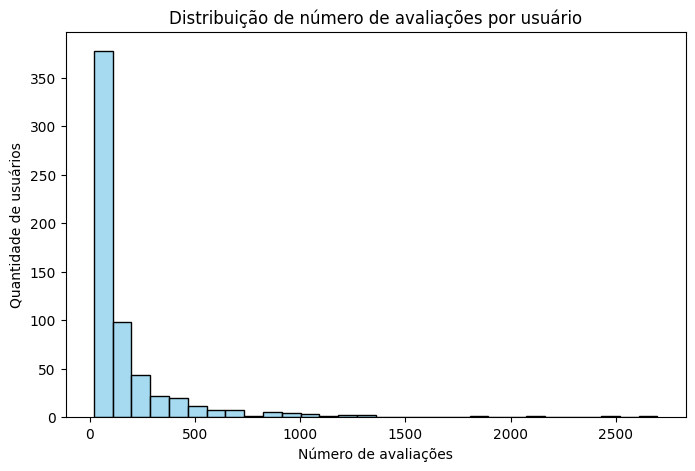

In [67]:
# Número de avaliações por usuário
num_avaliacoes_usuario = ratings.groupby('userId')['rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(num_avaliacoes_usuario, bins=30, kde=False, color='skyblue')
plt.title('Distribuição de número de avaliações por usuário')
plt.xlabel('Número de avaliações')
plt.ylabel('Quantidade de usuários')
plt.show()

### **Recomendação baseada em popularidade**
Nesta etapa, criamos um sistema de recomendação de filmes baseado na popularidade e na nota média das avaliações.  
Vamos:
- Identificar os filmes mais bem avaliados e mais assistidos.  
- Mostrar ao usuário quais filmes ele já avaliou ou assistiu.  
- Recomendar novos filmes, excluindo aqueles já avaliados pelo usuário.  

Essa abordagem simples permite sugerir títulos relevantes e populares, mostrando tendências gerais do público e personalizando a experiência do usuário.

In [68]:
# Calcular quantidade de avaliações e média por filme
filmes_populares = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
filmes_populares.columns = ['Quantidade de Avaliações', 'Nota Média']
filmes_populares = filmes_populares.reset_index()
filmes_populares = filmes_populares.merge(movies, on='movieId')

# Selecionar os filmes a serem recomendados
top_filmes = filmes_populares.sort_values(
    by=['Nota Média', 'Quantidade de Avaliações'], ascending=False
).head(10)

usuario_id = int(input("Digite o seu ID de usuário (1 a 610) para receber recomendações: "))
print(f"\n👤 Olá, Usuário {usuario_id}! Aqui estão os filmes que recomendamos para você:\n")

# Mostrar recomendações
for i, row in top_filmes.iterrows():
    print(f"{i+1}. {row['title']} — Nota média: {row['Nota Média']:.2f}, Avaliações: {row['Quantidade de Avaliações']}")

print("\n🎬 Obrigado por utilizar nosso sistema! Aproveite os filmes!")


👤 Olá, Usuário 5! Aqui estão os filmes que recomendamos para você:

49. Lamerica (1994) — Nota média: 5.00, Avaliações: 2
88. Heidi Fleiss: Hollywood Madam (1995) — Nota média: 5.00, Avaliações: 2
870. Lesson Faust (1994) — Nota média: 5.00, Avaliações: 2
2594. Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) — Nota média: 5.00, Avaliações: 2
4385. Belle époque (1992) — Nota média: 5.00, Avaliações: 2
4584. Come and See (Idi i smotri) (1985) — Nota média: 5.00, Avaliações: 2
7348. Enter the Void (2009) — Nota média: 5.00, Avaliações: 2
122. Awfully Big Adventure, An (1995) — Nota média: 5.00, Avaliações: 1
406. Live Nude Girls (1995) — Nota média: 5.00, Avaliações: 1
433. In the Realm of the Senses (Ai no corrida) (1976) — Nota média: 5.00, Avaliações: 1

🎬 Obrigado por utilizar nosso sistema! Aproveite os filmes!
